In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('/home/armin/Documents/Kaggle/Titanic/train.csv')
pd.set_option('display.max_columns',500)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [120]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
data['Age'].fillna(np.mean(data['Age']),inplace = True)

In [67]:
Survived = np.sum(data['Survived'])/len(data) * 100
Not_Survived = 100 - Survived
Surv_class = ['Survived' , 'Not_Survived']
Surv_data = [Survived , Not_Survived]

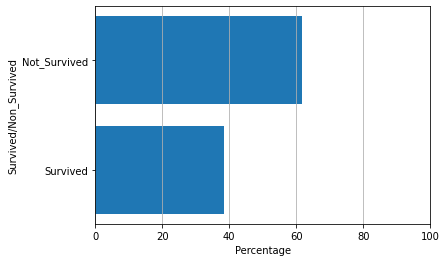

In [89]:
fig , ax1  = plt.subplots()
ax1.barh(Surv_class , Surv_data)
ax1.set(xlim = [0,100],xlabel = 'Percentage',ylabel = 'Survived/Non_Survived')
plt.grid(True , axis='x')

In [116]:
data['Pclass'].value_counts()
Dict = {}
for i in data['Pclass'].value_counts().index:
    data_pclass = {'Class_{}'.format(i) : data['Pclass'].value_counts()[i]/len(data) * 100}
    Dict.update(data_pclass)
group_data = list(Dict.values())
group_name = list(Dict.keys())

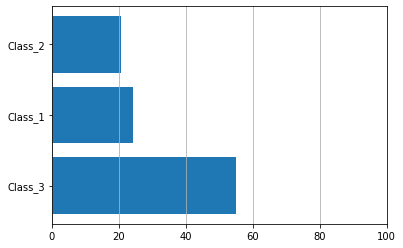

In [119]:
fig , ax = plt.subplots()
ax.barh(group_name,group_data)
plt.grid(True,axis='x')
ax.set(xlim = [0,100])
plt.show()

In [127]:
Dict = {}
for i in data['Sex'].value_counts().index:
    Gender = {i : data['Sex'].value_counts()[i]/len(data) * 100}
    Dict.update(Gender)
group_data = list(Dict.values())
group_name = list(Dict.keys())

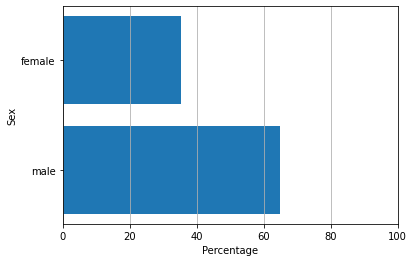

In [132]:
fig , ax = plt.subplots()
ax.barh(group_name,group_data)
plt.grid(True,axis='x')
ax.set(xlim = [0,100],xlabel = 'Percentage',ylabel = 'Sex')
plt.show()

In [134]:
data['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [135]:
bins = [0,10,18,30,60,80]
labels = ['Kid','Youth','Young','Adult','Oldery']
data['AgeGroup'] = pd.cut(data['Age'] , bins=bins , labels=labels, right=False)

In [137]:
data['AgeGroup'].value_counts()


Young     448
Adult     304
Kid        62
Youth      51
Oldery     25
Name: AgeGroup, dtype: int64

In [138]:
Dict = {}
for i in data['AgeGroup'].value_counts().index:
    Gender = {i : data['AgeGroup'].value_counts()[i]/len(data) * 100}
    Dict.update(Gender)
group_data = list(Dict.values())
group_name = list(Dict.keys())

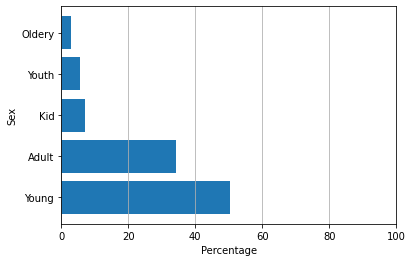

In [139]:
fig , ax = plt.subplots()
ax.barh(group_name,group_data)
plt.grid(True,axis='x')
ax.set(xlim = [0,100],xlabel = 'Percentage',ylabel = 'Sex')
plt.show()

In [140]:
Dict = {}
for i in data['SibSp'].value_counts().index:
    Gender = {i : data['SibSp'].value_counts()[i]/len(data) * 100}
    Dict.update(Gender)
group_data = list(Dict.values())
group_name = list(Dict.keys())

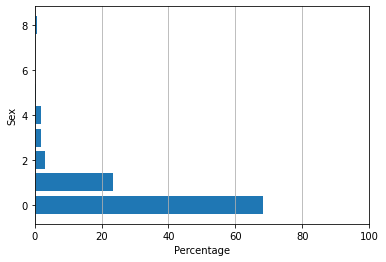

In [141]:
fig , ax = plt.subplots()
ax.barh(group_name,group_data)
plt.grid(True,axis='x')
ax.set(xlim = [0,100],xlabel = 'Percentage',ylabel = 'Sex')
plt.show()

In [142]:
Dict = {}
for i in data['Parch'].value_counts().index:
    Gender = {i : data['Parch'].value_counts()[i]/len(data) * 100}
    Dict.update(Gender)
group_data = list(Dict.values())
group_name = list(Dict.keys())

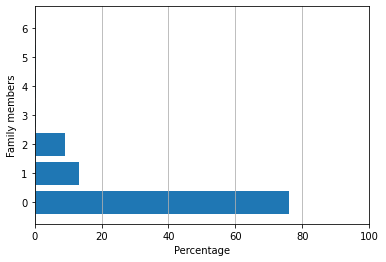

In [144]:
fig , ax = plt.subplots()
ax.barh(group_name,group_data)
plt.grid(True,axis='x')
ax.set(xlim = [0,100],xlabel = 'Percentage',ylabel = 'Family members')
plt.show()

In [145]:
Dict = {}
for i in data['Embarked'].value_counts().index:
    Gender = {i : data['Embarked'].value_counts()[i]/len(data) * 100}
    Dict.update(Gender)
group_data = list(Dict.values())
group_name = list(Dict.keys())

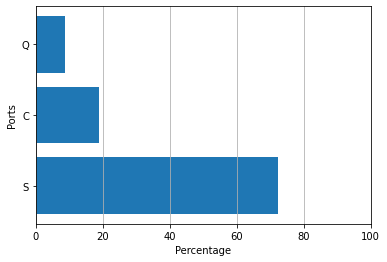

In [147]:
fig , ax = plt.subplots()
ax.barh(group_name,group_data)
plt.grid(True,axis='x')
ax.set(xlim = [0,100],xlabel = 'Percentage',ylabel = 'Ports')
plt.show()